In [1]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [3]:
inputs = df.drop('Survived', axis='columns')
target = df.Survived

In [4]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [5]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [6]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [7]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [9]:
len(X_train)

712

In [10]:
len(X_test)

179

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
model.score(X_test, y_test)

0.7821229050279329

In [13]:
model.predict([[3, 1, 22.0, 7.2500]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [14]:


import matplotlib.pyplot as plt

AttributeError: 'DataFrame' object has no attribute 'gender'

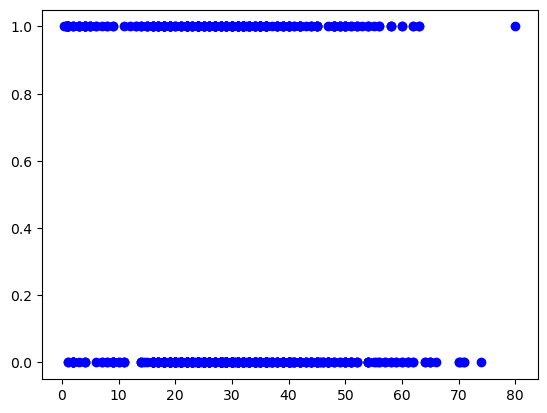

In [18]:
# scatter plot for inputs vs target

plt.scatter(df.Age, df.Survived, color='blue', label='age')
plt.scatter(df.gender, df.Survived, color='orange', label='gender')

plt.show()

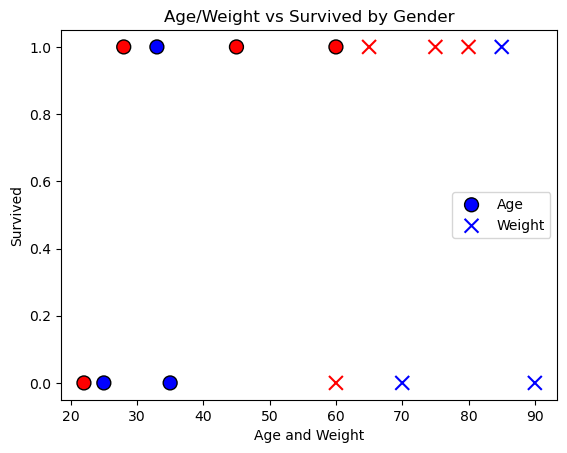

In [19]:
age = [25, 45, 60, 35, 22, 33, 28]
weight = [70, 80, 65, 90, 60, 85, 75]
gender = ['male', 'female', 'female', 'male', 'female', 'male', 'female']
survived = [0, 1, 1, 0, 0, 1, 1]

# Mapping genders to colors
color_map = {'male': 'blue', 'female': 'red'}
colors = [color_map[g] for g in gender]

# Scatter plot for Age vs Survived, colored by Gender
plt.scatter(age, survived, c=colors, label='Age', s=100, edgecolor='black')

# Optionally, plot Weight vs Survived on the same graph
plt.scatter(weight, survived, c=colors, marker='x', label='Weight', s=100)

# Adding labels and legend
plt.xlabel('Age and Weight')
plt.ylabel('Survived')
plt.title('Age/Weight vs Survived by Gender')
plt.legend(['Age', 'Weight'])

# Show the plot
plt.show()